# Data Engineer Assessment
## UC01: TTD_DE_UC01_EDA: Perform `Exploratory Data Analysis (EDA)` on provided CSV data

## Summary
This assessments evaluate the capabilities of the candidate in solving data engineering use cases. The candidate is required to solve the below assessment questions using a Jupyter notebook and post the solutions in the notebook in the assessment section.  

Each assessment is structured as a collection of one or more scenarios that need to be addressed by the data engineer.


* __Problem Statement__ - Business users have asked the data engineers to assist with exploratory data analysis to enable business make informed decisions.
* __Description__ - Business would like to perform `Exploratory Data Analysis` on the dataset as part of reporting and also to prepare data for Machine Learning purposes.  
The business user has recently joined the organization and is unfamiliar with the data and has asked the data engineer to just assist with the review of the data so that they generate reports together.

The business user would first like to explore the data and see if there are any patterns in the data that can be used for reporting.


## Code Complexity
- Low / Medium


## `Diagram - Also refer PDF in folder`

![Exploratory Data Analysis](./TTD_UC01_EDA.png "Exploratory Data")



## Datasets:

`File Location`: Refer to the attached `data` folder for information

* Vehicles (vehicles.csv)  at the plants (plants.csv) are built to order (orders.csv) placed - order_number
* Vehicles are manufactured at different Company plants (plants.csv)-  (plant_code_id)
* Customer (customers.csv) provides reviews(welcome_call.csv) 60 to 80 days after the vehicles are delivered(vin)
* Orders (orders.csv) are logged by sales_rep_number at various BMW dealerships.
* Sales (sales_rep.csv) representatives are linked to dealership (dealers.csv) and have dealership names




## Perform the following joins:

* Link all the data based on the statements made above to create a larger dataset that answers the below questions.
* Identify any duplicates in the data and perform cleanup of the duplicates. Just drop the duplicates columns.
* The Dataset must contain vehicles linked to the order, sentiments, sales people, plants
* Provide the name of the sales person (first_name, last_name and sales_number the dealership)



## Questions: `Exploratory Data Analysis - Provide graphs for options below and document your observations in markdown. `

1. Perform `Exploratory data analysis` and provide insights into the data.
2.  Provide the distribution by brand, model, iso_country.
3. Provide the percentage of customers that have purchased more than 1 car.
4.  Provide the distribution of the vehicles manufactured by the plants and provide information brand, model  etc.
5.  Provide the top sales peoples per dealership - 10 top sales people
6.  Indicate the total sales per dealership.
7.  Get the models of the cars that had the most positive reviews (reviews greater than 3.5)
8.  Provide a distribution of the vehicles by different status.
9.  List all the dealerships that have sold the Rolls-Royce brand.




## Libraries or Options used
* Jupyter Notebook - Install and run locally on your laptop or device.
* PySpark, Pandas and matplot lib or similar plotting libraries.
* Other Python libraries required for Exploratory Data Analysis



## `Acceptance Criteria`
The following acceptance criteria must be met:

1. Perform Exploratory data Analysis and present your results as observations.
2. Python Graph libraries must be used to plot graphs to support your findings.
3. Comment your notebook file with markdown indicating observations: and write statements to indicate your observations.
4. Perform Analysis fo the Data using Spark or Pandas

# Implementation

Provide all the implementation steps in the sections that follow. Ensure that you provide detailed explanations of the approach.


### Import the libraries that you need for EDA

In [1]:
# Import any relevant libraries
import os
import re

import pandas as pd
# Import other EDA libraries that you need below
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from IPython.display import display
from pandas.plotting import table



#### List of expected dataframes to be loaded


  * Vehicles (vehicles.csv) at the plants (plants.csv) are built to order (orders.csv) placed - order_number
  * Vehicles are manufactured at different Company plants (plants.csv)- (plant_code_id)
  * Customer (customers.csv) provides reviews(welcome_call.csv) 60 to 80 days after the vehicles are delivered(vin)
  * Orders (orders.csv) are logged by sales_rep_number at various BMW dealerships.
  * Sales (sales_rep.csv) representatives are linked to dealership (dealers.csv) and have dealership names



### Load the data from the data folder into the data frame.

In [5]:
# Write your code below to load the relevant data into a data frame
os.chdir('/Users/nigel/Downloads/exd_download/TTD_DE_UC01_EDA/data')

vehicles_df = pd.read_csv('vehicles.csv',sep='|')
company_plants_df = pd.read_csv('plants.csv',sep='|') #joins vehicles on plant_code_id
orders_df = pd.read_csv('orders.csv',sep='|') ##logged by salesrep number
customers_df = pd.read_csv('customers.csv',sep='|')
reviews_df = pd.read_csv('welcome_call.csv',sep='|') #joins on vin
sales_reps_df = pd.read_csv('sales_person.csv',sep='|')
car_dealers_df = pd.read_csv('dealers.csv',sep='|')


# Perform any Clean up operations if required. remove duplicates etc.



#### Question: Did you need to perform any clean up on the dataframes. If yes. What cleanup operations did you perform

#### *Answer*: Created a function to handle the removal of duplicate column names when joining dataFrames together.



### Provide some statistical information about the data you just loaded


In [39]:
# Write code to provide statistical information about each dataframe that you just loaded.

# Write your code below

dataframes = {
    'vehicles_df': vehicles_df,
    'company_plants_df': company_plants_df,
    'orders_df': orders_df,
    'customers_df': customers_df,
    'reviews_df': reviews_df,
    'sales_reps_df': sales_reps_df,
    'car_dealers_df': car_dealers_df
}
for df_name, df in dataframes.items():
    print(f'**** Statistical Information for dataset : {df_name}  **** ','\n') 
    df.info()

    print(f' ----------------------  describe df','\n')
    print(df.describe(),'\n')

    print(f' ----------------------  provides number of rows and columns in the dataset ','\n')
    print(df.shape,'\n')  

    print(f' ----------------------  provides unique count of values for each column ','\n')
    print(df.nunique(),'\n') 





**** Statistical Information for dataset : vehicles_df  ****  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193705 entries, 0 to 193704
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      193705 non-null  object 
 1   order_number             193705 non-null  object 
 2   model_key                193705 non-null  object 
 3   paint_code               193705 non-null  object 
 4   paint_descr              193705 non-null  object 
 5   make                     193705 non-null  object 
 6   model                    193705 non-null  object 
 7   category                 193705 non-null  object 
 8   brand                    193705 non-null  object 
 9   fuel_type                193705 non-null  object 
 10  engine_capacity          193705 non-null  float64
 11  transmission_type        193705 non-null  object 
 12  body_fabrication_date    193705 non-null  object 


### Perform all the relevant join operations between the datasets.

Hint! - Relationship between the datasets is mentioned above


In [41]:
# Perform the queries to perform the relevant dataframe join operations.


#Function to drop duplicate columns after merge/joins
def rmv_suffixes(df):
    
    to_drop = [x for x in df if x.endswith('_y')]
    if to_drop is not None:
        df.drop(to_drop, axis=1, inplace=True)
    
        for col in df:
            if col.endswith('_x'):
                df.rename(columns={col:col.rstrip('_x')}, inplace=True)
    return df

##Joins

## link vehicles to plants based on orders --> Each vehicle has an order number thats linked to a plant

vehicle_oders_df = pd.merge(vehicles_df, orders_df, on='order_number', how='left',suffixes=('_y', '_x'))
rmv_suffixes(vehicle_oders_df)

## Link sales_rep and orders to get plant number to join back to orders
reps_orders = pd.merge(orders_df, sales_reps_df, left_on='sales_rep_number',right_on='sales_number', how='inner',suffixes=('_y', '_x'))
rmv_suffixes(reps_orders)

# 
vehicle_oders_detail_df = pd.merge(vehicle_oders_df, reps_orders, on='order_number', how='inner',suffixes=('_y', '_x'))
rmv_suffixes(vehicle_oders_detail_df)

# Link orders to customers 
merged_customer_orders_df = pd.merge(vehicle_oders_detail_df, customers_df, left_on='customer_id',right_on='customer_id', how='inner',suffixes=('_y', '_x'))
rmv_suffixes(merged_customer_orders_df)

# Link reviews to each vehicle vin
merged_orders_reviews_df = pd.merge(merged_customer_orders_df, reviews_df, left_on='vin',right_on='vin', how='inner',suffixes=('_y', '_x'))
rmv_suffixes(merged_orders_reviews_df)

# Link dealers to orders - final join
denormalized_df = pd.merge(merged_orders_reviews_df, car_dealers_df, left_on='dealer_number',right_on='dealer_code', how='left',suffixes=('_y', '_x'))
rmv_suffixes(denormalized_df)




,vin,model_key,paint_code,paint_descr,make,fuel_type,engine_capacity,transmission_type,body_fabrication_date,assembly_date,...,dealer_type,bmw_owned,dealer_tier,primary_contact,dealer_city,iso_country_code,dealer_contact,dealer_email,postal_code,dealer_locale
0,1G8MG31X28U3Y1GZM,JXJM,BL2C,BLACK SAPPHIRE METALLIC,BMW,diesel,3.2,steptronic,2010-06-22,2010-08-22,...,service provider,0,tier3,Taimur Das,Kalyan-Dombivli,IN,+915125193785,Taimur.Das@bmwsalesteam.de,731403,en_IN
1,JTMEF4DV3APN2DT3U,MSR3,SOME,SUNSET ORANGE BLUE,BMW,petrol,5.7,automatic,2004-03-24,2004-05-24,...,primary,1,tier2,Taimur Das,Rajkot,IN,+910743919408,Taimur.Das@bmwauto.com,693520,en_IN
2,1GTGC79T63PH98L8U,CRTM,SKYG,SKYSCRAPER GRAU METALLIC,Rolls-Royce,hydrogen and electric,4.0,manual,2004-10-12,2004-11-12,...,secondary,0,tier3,Taimur Das,Bhusawal,IN,07192516392,Taimur.Das@bmwsalesteam.in,866741,en_IN
3,3GTU1WF20BB5DG9P1,JXJM,STRM,STORM BAY METALLIC,BMW,petrol,5.6,steptronic,2007-04-23,2007-05-23,...,partner,0,premier,Taimur Das,Kozhikode,IN,5075646541,Taimur.Das@bmwsalesteam.de,276531,en_IN
4,JM1BK22F84X3VRH36,JXJM,ERED,EXOTIC METALLIC RED,BMW,hydrogen and electric,4.7,automatic,2022-08-15,2022-09-15,...,primary,1,tier3,Taimur Das,Alappuzha,IN,9508322855,Taimur.Das@bmwgrp.de,053953,en_IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195926,1GBZGJB66A93SPHTX,MSR3,BL2C,BLACK SAPPHIRE METALLIC,MINI,petrol and electric,3.4,steptronic,2006-03-11,2006-04-11,...,primary,0,tier2,Kenneth Stephens,Port Michelleland,US,163-221-1600x7638,Kenneth.Stephens@bmwfinancialservices.de,49145,en_US
195927,JHMCG556619AHTGV7,JXJM,BL2C,BLACK SAPPHIRE METALLIC,BMW,hydrogen and electric,4.6,manual,2022-12-09,2023-02-09,...,secondary,1,tier2,Robert James,Richchester,US,(903)534-1430,Robert.James@bmwgrp.de,56162,el_CY
195928,1GDJG31C58TAD0E4N,MSR5,GLCM,GLACIERSILBER METALLIC,BMW,diesel,2.4,steptronic,2012-04-23,2012-05-23,...,secondary,1,premier,Robert James,Lake James,US,704-871-2533,Robert.James@bmwsalesteam.us,91183,el_CY
195929,1FMEU18W6X7MDY2TA,2X31,MINM,MINERALWEISS METALLIC,BMW,petrol and electric,6.0,automatic,2017-06-15,2017-08-15,...,secondary,0,premier,Kenneth Stephens,Timothyton,US,(454)431-8381x306,Kenneth.Stephens@bmwfinancialservices.com,19048,en_US


#### Question: Did you perform any joins on the datasets. If yes, what joins. Also what information was available after the joins were performed.

#### *Answer*: I combined all dataframes/datasets provided based on the relationships defined above of the data to build a combined dataset for analytical operations. after joining the data Together  have a wholistic view of each transaction without the need to perfom additional joins when analysing the data.
####           

### Perform All the standard Exploratory Data Analysis in the sections that follow to provide information to the Business users about the data. Report your findings in the form of Graphs or Response statements

Distribution by Brand:
BMW            147575
MINI            32828
Rolls-Royce     15528
Name: brand, dtype: int64


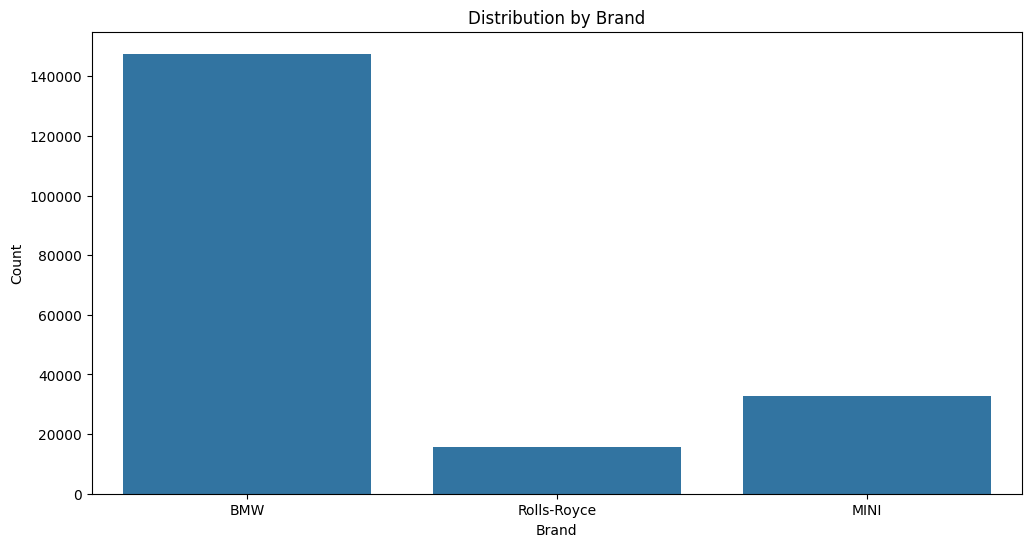


Distribution by Model:
7 Series          12797
3 Series          12706
5 Series          11822
M3                 9339
X5                 9268
X3                 7827
M5                 7687
Convertible        7061
Z4                 6884
6 Series           6877
M6                 6156
Phantom            6010
X6                 5534
Clubman            5151
X6 M               5020
Countryman         4906
Ghost              4602
X5 M               4102
X1                 3759
8 Series           3728
4 Series           3362
i3                 3287
2 Series           3223
Wraith             2905
Hardtop 2 Door     2856
Z3                 2856
Hardtop 4 Door     2839
M4                 2821
Cooper             2811
X4                 2793
i8                 2792
M2                 2398
Hardtop            2386
1 Series           2294
Dawn               2011
Z8                 1665
X7                 1650
Roadster           1628
Paceman            1617
X2                 1602
Coupe           

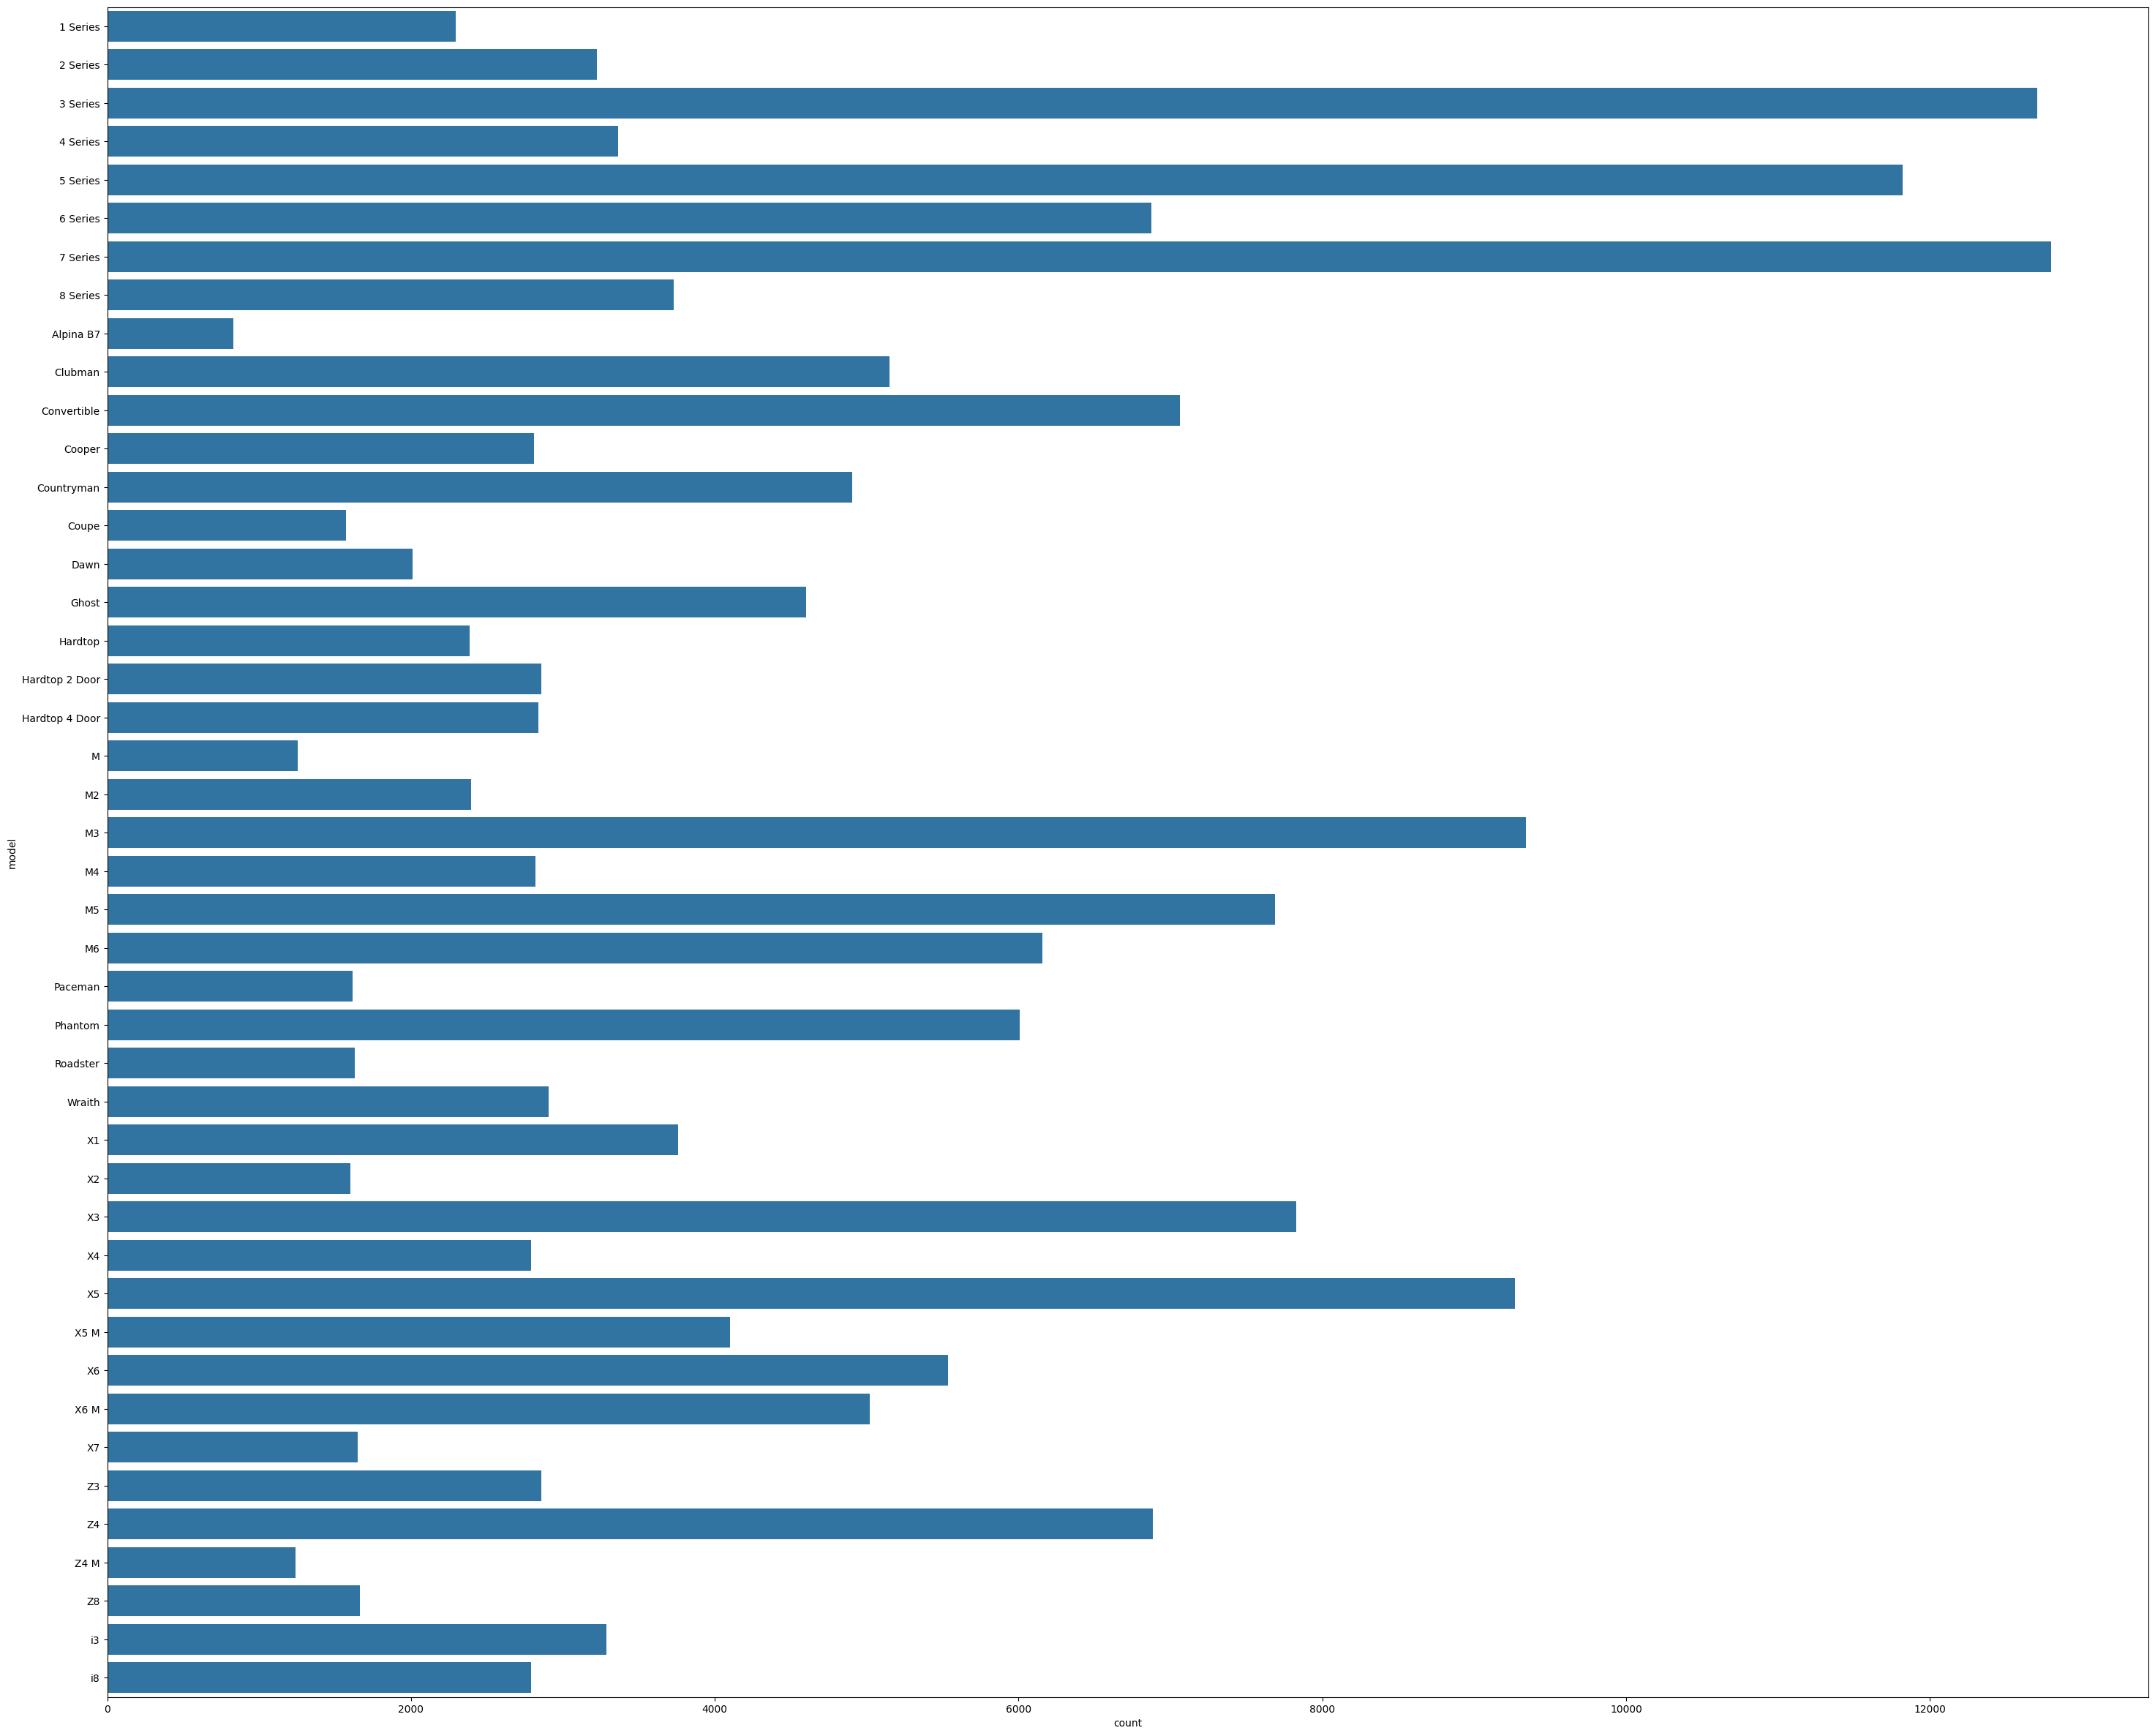

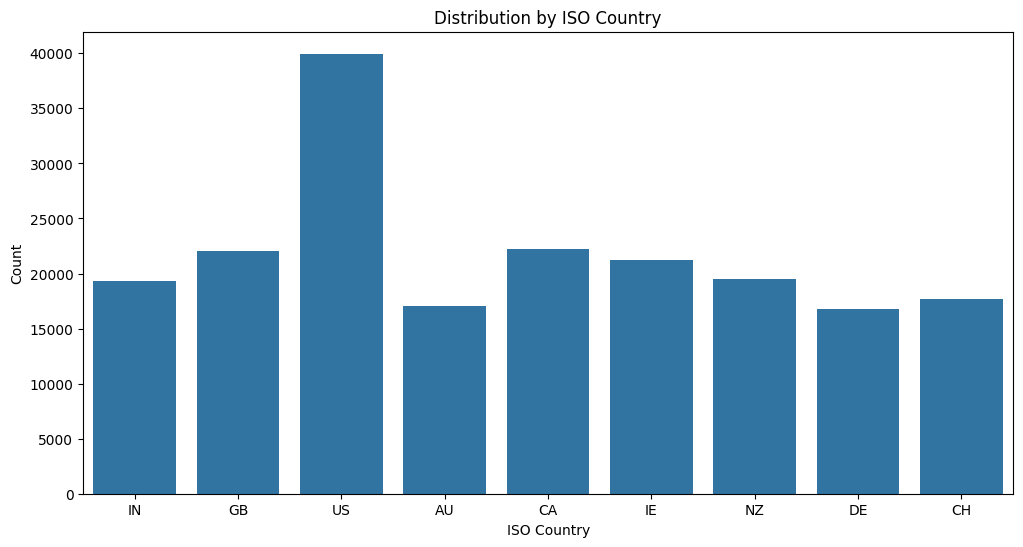

In [43]:
# 1.0  Provide the distribution by brand, model, iso_country.

# Display distribution by brand
brand_distribution = denormalized_df['brand'].value_counts()
print("Distribution by Brand:")
print(brand_distribution)

# Plot distribution by brand
plt.figure(figsize=(12, 6))
sns.countplot(x='brand', data=denormalized_df)
plt.title('Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

# ------------------------------------------------------------------------------------

# Display distribution by model
model_distribution = denormalized_df['model'].value_counts()
print("\nDistribution by Model:")
print(model_distribution)


df = denormalized_df.groupby(['model']).size().reset_index(name='count')
plt.figure(figsize=(36, 30))
ax = sns.barplot(x='count', y='model', data=df)
ax.set_xlabel('count')



# ------------------------------------------------------------------------------------

# Display distribution by ISO country
iso_country_distribution = denormalized_df['iso_country'].value_counts()
print("\nDistribution by ISO Country:")
print(iso_country_distribution)

# Plot distribution by ISO country
plt.figure(figsize=(12, 6))
sns.countplot(x='iso_country', data=denormalized_df)
plt.title('Distribution by ISO Country')
plt.xlabel('ISO Country')
plt.ylabel('Count')
plt.show()


In [44]:
# 2.0  Provide the percentage of customers that have purchased more than 1 car.


car_orders = denormalized_df.groupby('customer_id')['vin'].count().reset_index(name='num_cars')
multiple_orders = car_orders[car_orders['num_cars'] > 1]
total_customers = car_orders['customer_id'].nunique()
multiple_orders_percentage = (len(multiple_orders) / total_customers) * 100

print(f"customers who purchased more than one car are : {multiple_orders_percentage:.2f}%")

customers who purchased more than one car are : 50.70%


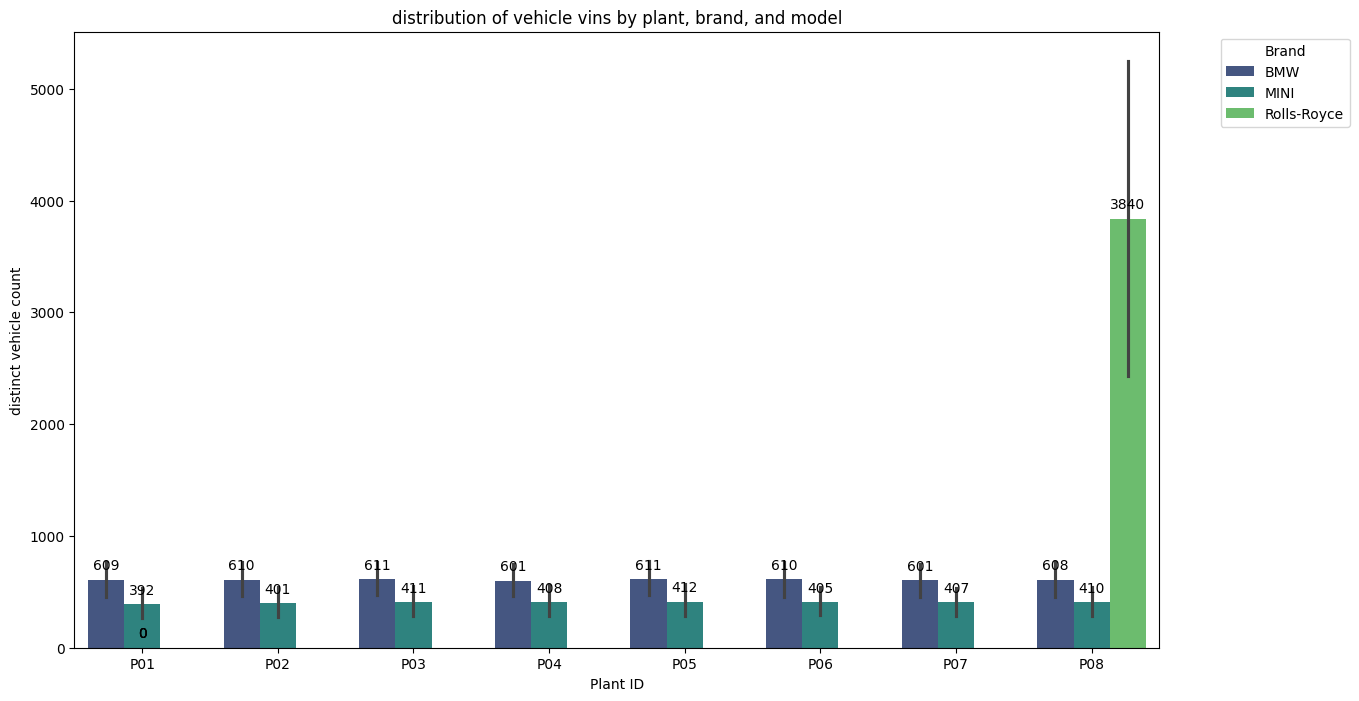

In [47]:
# 3.0 Provide the distribution of the vehicles manufactured by the plants and provide information brand, model  etc.


distinct_vin_count = denormalized_df.groupby(['prod_plant_id', 'brand', 'model'])['vin'].nunique().reset_index()
#distribution of distinct VINs by plant, brand, and model
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='prod_plant_id', y='vin', hue='brand', data=distinct_vin_count, palette='viridis')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('distribution of vehicle vins by plant, brand, and model')
plt.xlabel('Plant ID')
plt.ylabel('distinct vehicle count')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




In [50]:
## 04  Provide the top sales peoples per dealership - 10 top sales people

# Loop to print the top 10 salespeople for each delearship
for delearship in denormalized_df['dealer_number'].unique():
    top_10_salespeople = (denormalized_df[denormalized_df['dealer_number'] == delearship]
                          .groupby('personnel_number')['sales_number'].count()
                          .reset_index()
                          .sort_values(by='sales_number', ascending=False)
                          .head(10))

    print(f"\nTop 10 Salespeople at {delearship}:\n")
    print(top_10_salespeople)



Top 10 Salespeople at DNIN28169:

    personnel_number  sales_number
0   EMIN28169BMW2445            25
7   EMIN28169BMW5980            22
5   EMIN28169BMW5854            19
9   EMIN28169BMW6426            17
8   EMIN28169BMW6203            16
10  EMIN28169BMW7053            15
2   EMIN28169BMW4457            13
4   EMIN28169BMW5779            13
1   EMIN28169BMW3331            12
3   EMIN28169BMW5583            12

Top 10 Salespeople at DNIN38670:

    personnel_number  sales_number
4   EMIN38670BMW3819            24
1   EMIN38670BMW1807            21
6   EMIN38670BMW7029            20
5   EMIN38670BMW5358            19
7   EMIN38670BMW7757            19
8   EMIN38670BMW7893            18
9   EMIN38670BMW8306            17
2   EMIN38670BMW2238            16
3   EMIN38670BMW2657            15
10  EMIN38670BMW8797            15

Top 10 Salespeople at DNIN31785:

    personnel_number  sales_number
2   EMIN31785BMW2444            23
6   EMIN31785BMW5496            20
9   EMIN31785BMW7215

Text(0.5, 0, 'total sales')

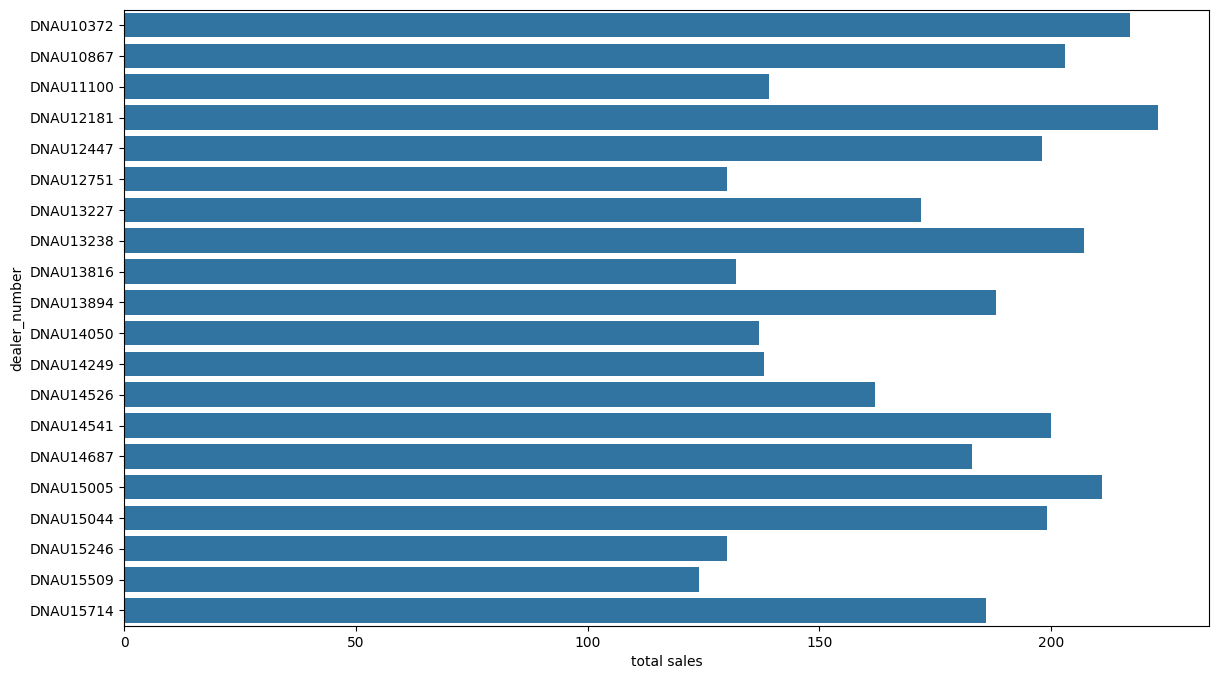

In [51]:
#05 Indicate the total sales per dealership.

df_sales = denormalized_df.groupby(['dealer_number']).size().reset_index(name='total sales')
df_sales_limited = df_sales.head(20)
plt.figure(figsize=(14, 8))


ax = sns.barplot(x='total sales', y='dealer_number', data=df_sales_limited)
ax.set_xlabel('total sales')



In [54]:
# 06 Get the models of the cars that had the most positive reviews (reviews greater than 3.5)

model_avg_rating = denormalized_df.groupby('model')['ratings'].mean().reset_index().sort_values(by='ratings', ascending=False)
top_rated = model_avg_rating[denormalized_df['ratings'] > 3.5]

print(top_rated)




             model   ratings
11          Cooper  4.216649
38              Z3  4.212185
4         5 Series  4.203984
16         Hardtop  4.200754
32              X4  4.200322
7         8 Series  4.200107
13           Coupe  4.199936
17  Hardtop 2 Door  4.199055
28          Wraith  4.198107
1         2 Series  4.196401
22              M4  4.195853
6         7 Series  4.195749
9          Clubman  4.193943
31              X3  4.191900
23              M5  4.191297
40            Z4 M  4.190016
2         3 Series  4.189045
39              Z4  4.186810
24              M6  4.186160
5         6 Series  4.182856
30              X2  4.182584
21              M3  4.182568
25         Paceman  4.181818
37              X7  4.180606
42              i3  4.178887
26         Phantom  4.178702
19               M  4.177033
29              X1  4.176111
15           Ghost  4.174924
14            Dawn  4.169319
8        Alpina B7  4.090964


/var/folders/lm/_s_4g3hj26q_j_8lj3hfmycm0000gn/T/ipykernel_22889/2321174338.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_rated = model_avg_rating[denormalized_df['ratings'] > 3.5]


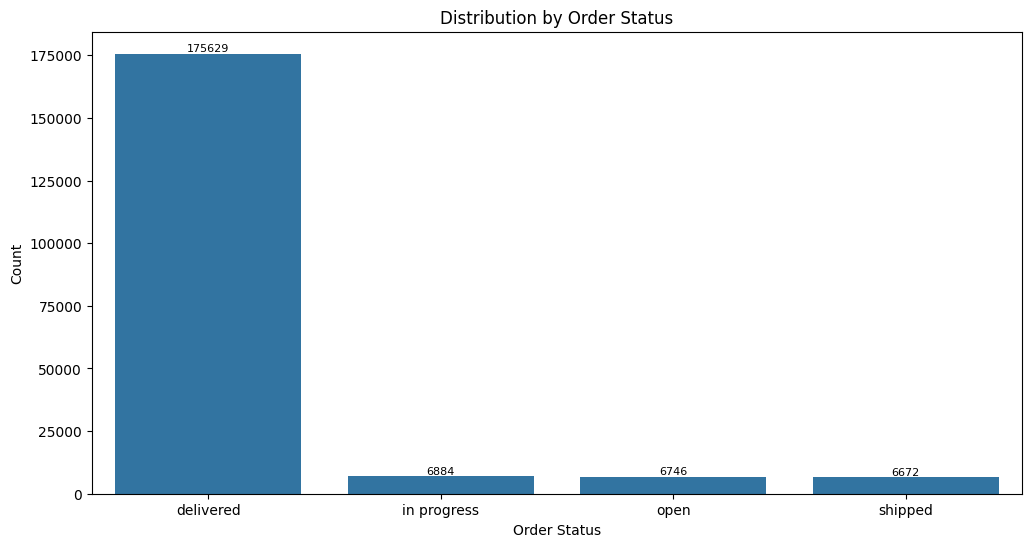

In [56]:
# 07 Provide a distribution of the vehicles by different status.

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='order_status', data=denormalized_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom', fontsize=8)

plt.title('Distribution by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()


In [59]:
# 08 List all the dealerships that have sold the Rolls-Royce brand.
rr_dealerships = denormalized_df[denormalized_df['brand'] == 'Rolls-Royce']['dealer_number'].unique()
for i in rr_dealerships:
    print(i)


DNIN31785
DNIN16944
DNIN35833
DNIN35230
DNIN32705
DNIN11175
DNIN16718
DNIN22368
DNIN22634
DNIN23954
DNIN11131
DNIN31243
DNIN35311
DNIN25727
DNIN17034
DNIN12940
DNIN23523
DNIN22150
DNIN17721
DNIN38214
DNIN23099
DNIN21827
DNIN37995
DNIN26276
DNIN12730
DNIN14705
DNIN37981
DNIN16366
DNIN18350
DNIN32682
DNIN32292
DNIN30926
DNIN39327
DNIN24967
DNIN22386
DNIN20146
DNIN32953
DNIN17510
DNIN21575
DNIN16266
DNIN24120
DNIN34181
DNIN18975
DNIN37248
DNIN18963
DNIN22008
DNIN15838
DNIN39976
DNIN38894
DNIN13291
DNIN13785
DNIN39953
DNIN25272
DNIN25451
DNIN35393
DNIN22000
DNIN17762
DNIN20168
DNIN18262
DNIN27963
DNIN19915
DNIN28048
DNIN35045
DNIN13809
DNIN38670
DNIN18587
DNIN15369
DNIN14551
DNIN27660
DNIN14525
DNIN15158
DNIN25459
DNIN28232
DNIN10627
DNIN19197
DNIN36797
DNIN10266
DNIN25396
DNIN38399
DNIN16808
DNIN21365
DNIN34452
DNIN28169
DNIN34138
DNIN37980
DNIN20835
DNIN31141
DNIN39380
DNIN37680
DNIN33826
DNIN17642
DNIN31713
DNIN33710
DNIN12367
DNIN16885
DNIN12359
DNIN24942
DNIN30361
DNIN19381
DNIN34610


In [ ]:
# Write your own exploratory data analysis on the ingested dataframe and report on the different findings.
# also provide visual aids for each finding.

In [ ]:
# Use the matplotlib libraries or other graphing libraries and create charts to support your findings
import matplotlib

### Report all your Findings:

Report your findings in bullet points.
Example: For illustration purpose only - replace below with your own findings and support with Evidence
1. The US plant manufactured the most number of vehicles in 2023 etc. There were 30,000 vehicles manufactured at the plant etc.

## `Acceptance Criteria`
The following acceptance criteria must be met:

1. Perform Exploratory data Analysis and present your results as observations.
2. Python Graph libraries must be used to plot graphs to support your findings.
3. Comment your notebook file with markdown indicating observations: and write statements to indicate your observations.
4. Perform Analysis fo the Data using Spark or Pandas